In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.io import FortranFile
from cobaya.model import get_model
import yaml
import os
from getdist import plots, MCSamples

In [3]:
getdist_settings = {
    'smooth_scale_1D': 0.3,
    'smooth_scale_2D': 0.4,
    'boundary_correction_order': 1,
    'mult_bias_correction_order': 1,
    }

In [4]:
dataset_path = "/home/afarina/cobaya_likelihoods/data/planck_2018_pliklite_native/cl_cmb_plik_v22.dat"

planck_dat = np.genfromtxt(dataset_path)

In [5]:
planck_dat

array([[ 3.20000000e+01,  6.52720153e+00,  6.93104790e-01],
       [ 3.70000000e+01,  5.27440733e+00,  5.18730810e-01],
       [ 4.20000000e+01,  4.96452185e+00,  4.08305720e-01],
       ...,
       [ 1.95400000e+03, -7.02871522e-05,  3.52293228e-05],
       [ 1.97100000e+03,  8.39452374e-05,  3.63386423e-05],
       [ 1.98800000e+03,  8.39771223e-06,  3.75763001e-05]])

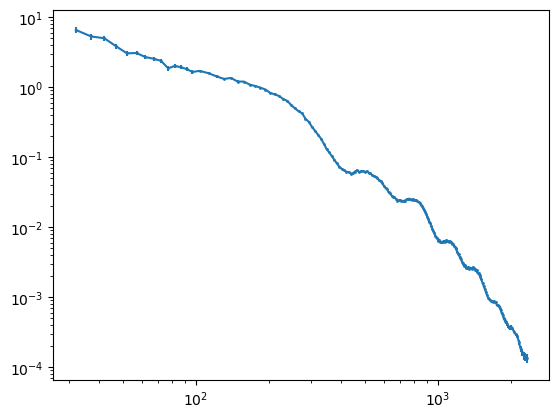

In [6]:
plt.errorbar(planck_dat[:210, 0], planck_dat[:210, 1], yerr = planck_dat[:210, 2], marker='o', ms = 1 )
plt.xscale('log')
plt.yscale('log')

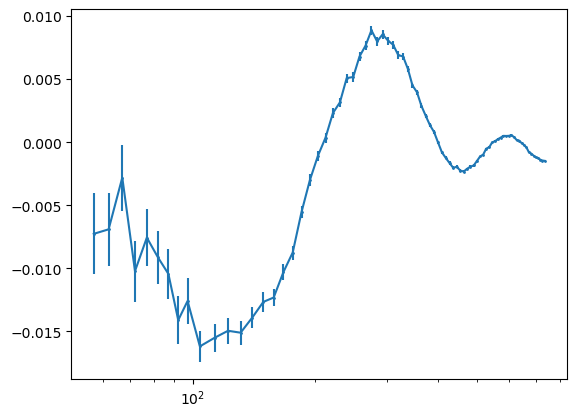

In [7]:
plt.errorbar(planck_dat[220:300, 0], planck_dat[220:300, 1], yerr = planck_dat[220:300, 2], marker='o', ms = 1 )
plt.xscale('log')
# plt.yscale('log')

## ACT

In [8]:
yaml_path = "/home/afarina/ParametricModels/LCDM/chains/01p3_LCDM_CMB_ACTTTTEEE.input.yaml"

In [9]:
# define the path to the YAML parameters file:
yaml_params = yaml_path #os.path.join(chains_dir, name + '.input.yaml')
# load the parameters from the YAML file:
with open(yaml_params, 'r') as f:
    params_dict = yaml.safe_load(f)
# remove the 'path' key from the 'camb' dictionary if it exists:
if 'path' in params_dict.get('theory', {}).get('camb', {}):
    del params_dict['theory']['camb']['path']
if 'recombination_model' in params_dict.get('theory', {}).get('camb', {}).get('extra_args', {}):
    del params_dict['theory']['camb']['extra_args']['recombination_model']
if 'max_zrei'in params_dict.get('theory', {}).get('camb', {}).get('extra_args', {}):
    del params_dict['theory']['camb']['extra_args']['max_zrei']
    print('Removed "max_zrei" from the "camb" extra_args in the YAML parameters file.')

# build the model:
model = get_model(params_dict)

Removed "max_zrei" from the "camb" extra_args in the YAML parameters file.
[model] *WARNING* Ignored blocks/options: ['sampler', 'output']
[camb] `camb` module loaded successfully from /home/afarina/anaconda3/envs/nbase/lib/python3.12/site-packages/camb


In [10]:
model.components[0].__dict__

{'delay': 0,
 '_measured_speed': None,
 '_name': 'act_dr6_cmbonly.ACTDR6CMBonly',
 'packages_path': '/home/afarina/cobaya_likelihoods',
 'url': 'https://lambda.gsfc.nasa.gov/data/act/pspipe/sacc_files/',
 'input_file': 'dr6_data_cmbonly.fits',
 'data_folder': '/home/afarina/cobaya_likelihoods/data/ACTDR6CMBonly',
 'version': 'v1.0',
 'ell_cuts': {'TT': [600, 1945], 'TE': [600, 1710], 'EE': [600, 1534]},
 'lmax_theory': 8502,
 'params': {'A_act': {'prior': {'dist': 'norm', 'loc': 1, 'scale': 0.0025},
   'ref': {'dist': 'norm', 'loc': 1, 'scale': 0.002},
   'proposal': 0.0005,
   'latex': 'A_{\\rm ACT}'},
  'P_act': {'prior': {'min': 0.9, 'max': 1.1},
   'ref': {'dist': 'norm', 'loc': 1.0, 'scale': 0.01},
   'proposal': 0.01,
   'latex': 'p_{\\rm ACT}'}},
 'type': [],
 'speed': -1,
 'stop_at_error': False,
 'log': <Logger act_dr6_cmbonly.actdr6cmbonly (INFO)>,
 'timer': None,
 'spec_meta': [{'data_type': 'cl_00',
   'tracer1': 'dr6_cmb_s0',
   'tracer2': 'dr6_cmb_s0',
   'pol': 'tt',
   

In [11]:
ACT_datavector = model.components[0].data_vec

In [12]:
ACT_covmat = model.components[0].covmat

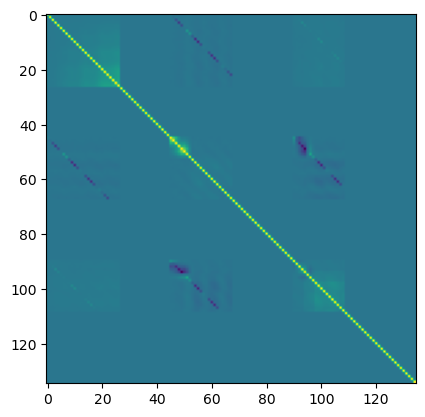

In [13]:
ACT_corr = ACT_covmat / np.outer( np.sqrt(np.diag(ACT_covmat)), np.sqrt(np.diag(ACT_covmat)))

plt.imshow(ACT_corr)

In [14]:
chains_dir = os.path.join('chains')

# import chain
from cobaya import load_samples

name = '01p3_LCDM_CMB_ACTTTTEEE'
chain = load_samples(os.path.join(chains_dir, name), skip=0.3, to_getdist=True)
chain.label = name
chain.root = os.path.join(chains_dir, name)
chain.updateSettings(getdist_settings)
chain.updateBaseStatistics()
chain.getConvergeTests()
print(chain.label+': R =', round(chain.GelmanRubin, 4))

[samplecollection] Loaded 3906 sample points from 'chains/01p3_LCDM_CMB_ACTTTTEEE.1.txt'
[samplecollection] Loaded 4377 sample points from 'chains/01p3_LCDM_CMB_ACTTTTEEE.2.txt'
[samplecollection] Loaded 4388 sample points from 'chains/01p3_LCDM_CMB_ACTTTTEEE.3.txt'
[samplecollection] Loaded 4003 sample points from 'chains/01p3_LCDM_CMB_ACTTTTEEE.4.txt'
01p3_LCDM_CMB_ACTTTTEEE: R = 0.0113


In [15]:
params = model.parameterization.sampled_params()
print(params)

{'H0': nan, 'logA': nan, 'ns': nan, 'ombh2': nan, 'omch2': nan, 'tau': nan, 'A_act': nan, 'P_act': nan}


In [16]:
BestFit = chain.getBestFit()
BestFitDict = BestFit.getParamDict()

In [17]:
for p in params.keys():
    params[p] = BestFitDict[p]  # Set the best fit values for all parameters

In [18]:
model.provider.set_current_input_params(params)
logposterior = model.loglike(params, return_derived=False)
Cls = model.provider.get_Cl(ell_factor=True)

In [35]:
Cls

{'ell': array([    0,     1,     2, ..., 10451, 10452, 10453]),
 'tt': array([0.00000000e+00, 0.00000000e+00, 1.07420923e+03, ...,
        1.17596796e-01, 1.17738309e-01, 1.17881813e-01]),
 'ee': array([0.        , 0.        , 0.04148078, ..., 0.00142582, 0.00142545,
        0.00142509]),
 'bb': array([0.00000000e+00, 0.00000000e+00, 1.97610555e-06, ...,
        1.09088333e-03, 1.09064410e-03, 1.09040500e-03]),
 'te': array([ 0.00000000e+00,  0.00000000e+00,  3.18886868e+00, ...,
        -1.95572631e-03, -1.95437136e-03, -1.95301324e-03]),
 'et': array([ 0.00000000e+00,  0.00000000e+00,  3.18886868e+00, ...,
        -1.95572631e-03, -1.95437136e-03, -1.95301324e-03])}

In [22]:
model.components[0].__dict__

{'delay': 0,
 '_measured_speed': None,
 '_name': 'act_dr6_cmbonly.ACTDR6CMBonly',
 'packages_path': '/home/afarina/cobaya_likelihoods',
 'url': 'https://lambda.gsfc.nasa.gov/data/act/pspipe/sacc_files/',
 'input_file': 'dr6_data_cmbonly.fits',
 'data_folder': '/home/afarina/cobaya_likelihoods/data/ACTDR6CMBonly',
 'version': 'v1.0',
 'ell_cuts': {'TT': [600, 1945], 'TE': [600, 1710], 'EE': [600, 1534]},
 'lmax_theory': 8502,
 'params': {'A_act': {'prior': {'dist': 'norm', 'loc': 1, 'scale': 0.0025},
   'ref': {'dist': 'norm', 'loc': 1, 'scale': 0.002},
   'proposal': 0.0005,
   'latex': 'A_{\\rm ACT}'},
  'P_act': {'prior': {'min': 0.9, 'max': 1.1},
   'ref': {'dist': 'norm', 'loc': 1.0, 'scale': 0.01},
   'proposal': 0.01,
   'latex': 'p_{\\rm ACT}'}},
 'type': [],
 'speed': -1,
 'stop_at_error': False,
 'log': <Logger act_dr6_cmbonly.actdr6cmbonly (INFO)>,
 'timer': None,
 'spec_meta': [{'data_type': 'cl_00',
   'tracer1': 'dr6_cmb_s0',
   'tracer2': 'dr6_cmb_s0',
   'pol': 'tt',
   

In [ ]:
model.components[0].spec_meta[0]

'tt'

In [30]:
lmin, lmax = 600, 6500

ls = Cls['ell']

mask_ls = (ls >= lmin) & (ls <= lmax)

In [31]:
ps_vec = np.zeros_like(ACT_datavector)

for m in model.components[0].spec_meta:
    idx = m["idx"]
    win = m["window"].weight.T
    ls = m["window"].values
    pol = m["pol"]
    dat = Cls[pol][ls] / (params['A_act'] * params['A_act'])
    if pol[0] == "e":
        dat /= params['P_act']
    if pol[1] == "e":
        dat /= params['P_act']

    ps_vec[idx] = win @ dat

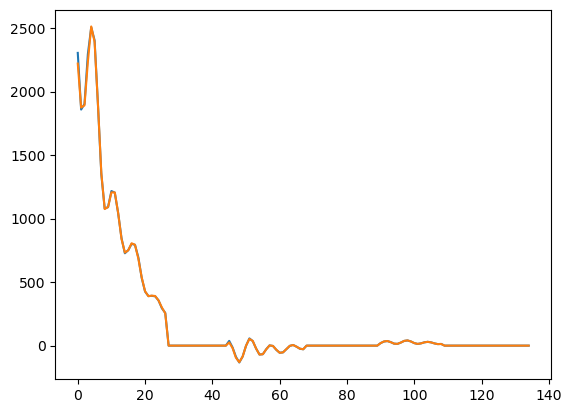

In [37]:
plt.plot(ACT_datavector)
plt.plot(ps_vec)

In [20]:
model.components[0].__dict__

{'delay': 0,
 '_measured_speed': None,
 '_name': 'act_dr6_cmbonly.ACTDR6CMBonly',
 'packages_path': '/home/afarina/cobaya_likelihoods',
 'url': 'https://lambda.gsfc.nasa.gov/data/act/pspipe/sacc_files/',
 'input_file': 'dr6_data_cmbonly.fits',
 'data_folder': '/home/afarina/cobaya_likelihoods/data/ACTDR6CMBonly',
 'version': 'v1.0',
 'ell_cuts': {'TT': [600, 1945], 'TE': [600, 1710], 'EE': [600, 1534]},
 'lmax_theory': 8502,
 'params': {'A_act': {'prior': {'dist': 'norm', 'loc': 1, 'scale': 0.0025},
   'ref': {'dist': 'norm', 'loc': 1, 'scale': 0.002},
   'proposal': 0.0005,
   'latex': 'A_{\\rm ACT}'},
  'P_act': {'prior': {'min': 0.9, 'max': 1.1},
   'ref': {'dist': 'norm', 'loc': 1.0, 'scale': 0.01},
   'proposal': 0.01,
   'latex': 'p_{\\rm ACT}'}},
 'type': [],
 'speed': -1,
 'stop_at_error': False,
 'log': <Logger act_dr6_cmbonly.actdr6cmbonly (INFO)>,
 'timer': None,
 'spec_meta': [{'data_type': 'cl_00',
   'tracer1': 'dr6_cmb_s0',
   'tracer2': 'dr6_cmb_s0',
   'pol': 'tt',
   

In [124]:
Cls

{'ell': array([    0,     1,     2, ..., 10451, 10452, 10453]),
 'tt': array([0.00000000e+00, 0.00000000e+00, 1.07420923e+03, ...,
        1.17596796e-01, 1.17738309e-01, 1.17881813e-01]),
 'ee': array([0.        , 0.        , 0.04148078, ..., 0.00142582, 0.00142545,
        0.00142509]),
 'bb': array([0.00000000e+00, 0.00000000e+00, 1.97610555e-06, ...,
        1.09088333e-03, 1.09064410e-03, 1.09040500e-03]),
 'te': array([ 0.00000000e+00,  0.00000000e+00,  3.18886868e+00, ...,
        -1.95572631e-03, -1.95437136e-03, -1.95301324e-03]),
 'et': array([ 0.00000000e+00,  0.00000000e+00,  3.18886868e+00, ...,
        -1.95572631e-03, -1.95437136e-03, -1.95301324e-03])}

In [118]:
cl_names = ["tt", "te", "ee"]
# Cls[cl_names]

In [114]:
#### Compute Jacobian

## Planck High-L

In [115]:
#### function for cutting Planck l-values in order to match with those of ACT

import numpy as np
from cobaya.likelihoods.base_classes import PlanckPlikLite

cl_names = ["tt", "te", "ee"]


class PlanckActCut(PlanckPlikLite):
    """
    A simple Planck likelihood that cuts the data above a certain ell value.
    This is intended to be used to combine Planck with ACT DR6, including
    the Planck low-ell data.

    Author: Hidde T. Jense
    """
    def init_params(self, ini):
        super().init_params(ini)

        ix = 0
        uses = {}
        for xy, lmin, lmax in zip(ini.list('use_cl'),
                                  ini.int_list('lmin_cuts'),
                                  ini.int_list('lmax_cuts')):
            idx = self.used_bins[cl_names.index(xy)]

            mask = np.logical_or(self.blmin[idx] < lmin,
                                 self.blmax[idx] > lmax)
            to_cut = idx[mask] + ix

            self.cov[to_cut, :] = 0.0
            self.cov[:, to_cut] = 0.0
            self.cov[to_cut, to_cut] = 1e10

            self.log.debug(f"Cutting bins {to_cut}")

            self.log.debug(f"Removing bins {to_cut} in {xy.upper()}.")

            ix += len(idx)
            if len(idx) > len(to_cut):
                uses[xy] = len(idx) - len(to_cut)

        self.invcov = np.linalg.inv(self.cov)

        self.log.debug(f"Using a total of {ix} bins.")
        self.log.debug("Breakdown:")
        for i, k in uses.items():
            self.log.debug(f"\t{i.upper()}: {k}")


In [68]:
yaml_path = "/home/afarina/ParametricModels/LCDM/chains/01p2_LCDM_CMB_PlanckTTTEEE.minimize.input.yaml"

# define the path to the YAML parameters file:
yaml_params = yaml_path #os.path.join(chains_dir, name + '.input.yaml')
# load the parameters from the YAML file:
with open(yaml_params, 'r') as f:
    params_dict = yaml.safe_load(f)
# remove the 'path' key from the 'camb' dictionary if it exists:
if 'path' in params_dict.get('theory', {}).get('camb', {}):
    del params_dict['theory']['camb']['path']
if 'recombination_model' in params_dict.get('theory', {}).get('camb', {}).get('extra_args', {}):
    del params_dict['theory']['camb']['extra_args']['recombination_model']

# build the model:
model = get_model(params_dict)

[model] *WARNING* Ignored blocks/options: ['sampler', 'output', 'minimize']
[camb] `camb` module loaded successfully from /home/afarina/anaconda3/envs/nbase/lib/python3.12/site-packages/camb


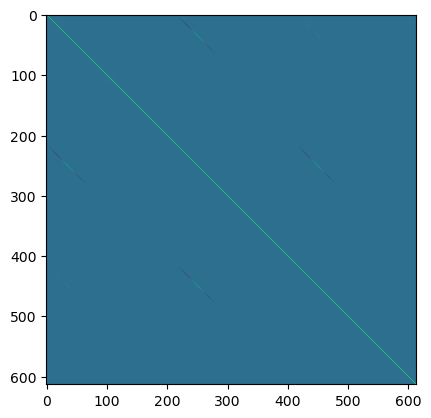

In [69]:
Planck_hl_cov = model.components[0].cov
Planck_hl_corr = Planck_hl_cov / np.outer( np.sqrt(np.diag(Planck_hl_cov)),  np.sqrt(np.diag(Planck_hl_cov)))

plt.imshow(Planck_hl_corr)

In [102]:
Planck_hl_X = model.components[0].X_data

In [4]:
#### path to covariance

cov_path = "/home/afarina/cobaya_likelihoods/data/planck_2018_pliklite_native/c_matrix_plik_v22.dat"

In [6]:
nbins = 613  

f = FortranFile(cov_path, 'r')
cov = f.read_reals(dtype=float).reshape((nbins, nbins))
cov = np.tril(cov) + np.tril(cov, -1).T  # make symmetric

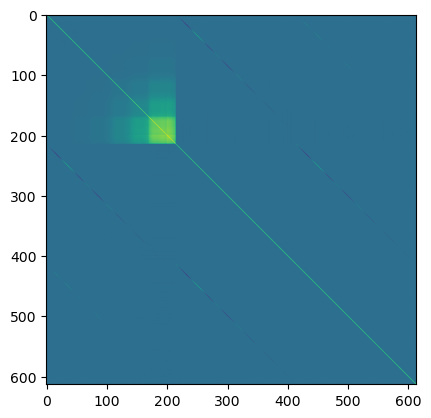

In [7]:
corr = cov / np.outer( np.sqrt(np.diag(cov)), np.sqrt(np.diag(cov)))

plt.imshow(corr)

## BAO